Class Names: ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


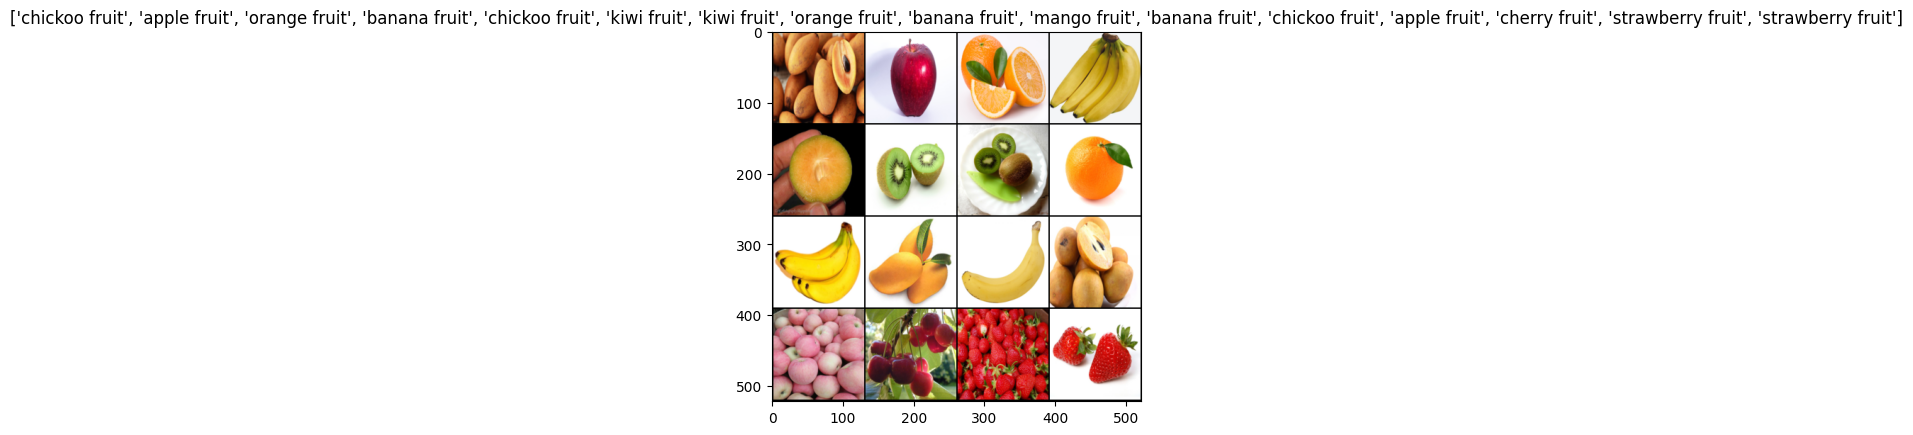

Image Dimensions: torch.Size([16, 3, 128, 128])


In [47]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, Subset
import random

random.seed(42)



transform = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),       
])

dataset = datasets.ImageFolder(root='fruits', transform=transform)
subset_size = int(0.2 * len(dataset))
indices = random.sample(range(len(dataset)), subset_size)
subset = Subset(dataset, indices)



class_names = dataset.classes
print("Class Names:", class_names)

data_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

def show_images(images, labels):
    images = make_grid(images, nrow=4)
    npimg = images.numpy().transpose((1, 2, 0))
    plt.imshow(npimg)
    plt.title([class_names[label] for label in labels])
    plt.show()

images, labels = next(iter(data_loader))

show_images(images, labels)

print("Image Dimensions:", images.shape)  #


In [48]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = len(class_names)
model = SimpleCNN(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Complete!")

torch.save(model.state_dict(), 'classifier_cnn_model.pt')

Epoch 1/10: 100%|██████████| 23/23 [00:10<00:00,  2.14it/s]


Epoch [1/10], Loss: 2.2839, Accuracy: 13.65%


Epoch 2/10: 100%|██████████| 23/23 [00:10<00:00,  2.22it/s]


Epoch [2/10], Loss: 2.0881, Accuracy: 24.51%


Epoch 3/10: 100%|██████████| 23/23 [00:10<00:00,  2.17it/s]


Epoch [3/10], Loss: 1.8648, Accuracy: 38.44%


Epoch 4/10: 100%|██████████| 23/23 [00:10<00:00,  2.25it/s]


Epoch [4/10], Loss: 1.6302, Accuracy: 46.24%


Epoch 5/10: 100%|██████████| 23/23 [00:09<00:00,  2.30it/s]


Epoch [5/10], Loss: 1.4315, Accuracy: 53.76%


Epoch 6/10: 100%|██████████| 23/23 [00:09<00:00,  2.31it/s]


Epoch [6/10], Loss: 1.2829, Accuracy: 59.33%


Epoch 7/10: 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]


Epoch [7/10], Loss: 1.0980, Accuracy: 66.02%


Epoch 8/10: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]


Epoch [8/10], Loss: 1.0114, Accuracy: 67.97%


Epoch 9/10: 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]


Epoch [9/10], Loss: 0.8986, Accuracy: 72.42%


Epoch 10/10: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]


Epoch [10/10], Loss: 0.9116, Accuracy: 72.42%
Training Complete!


Class Names: ['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


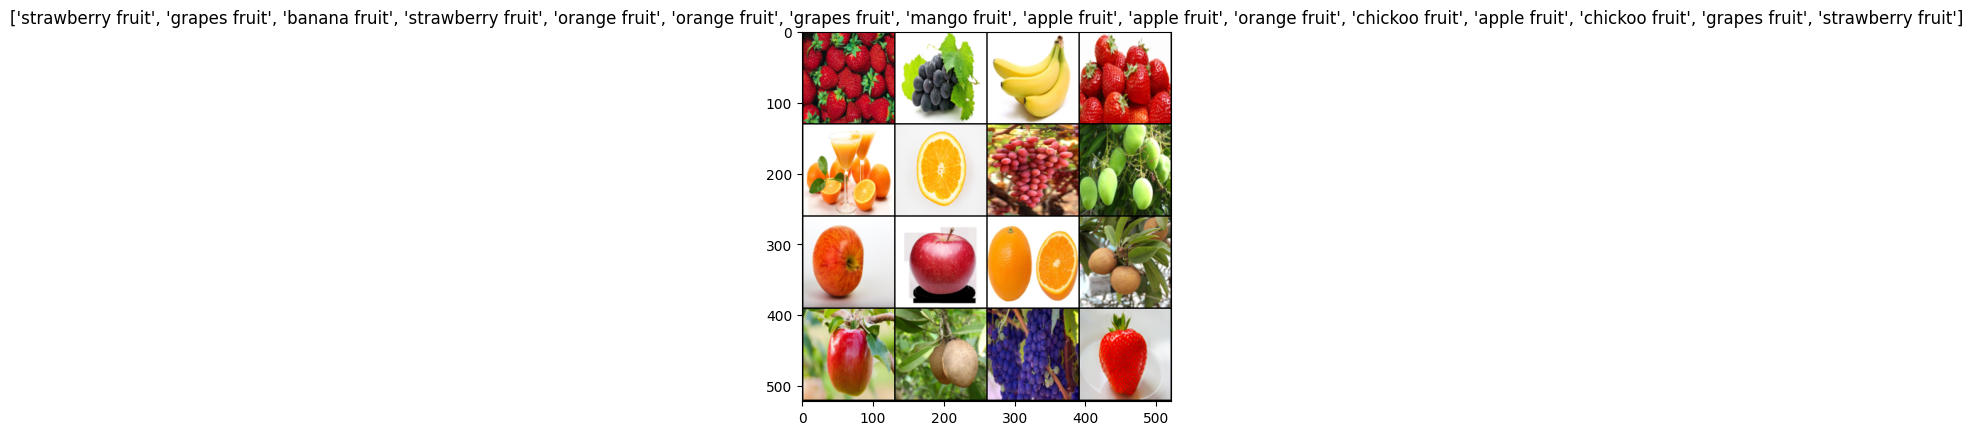

Image Dimensions: torch.Size([16, 3, 128, 128])


Epoch 1/10: 100%|██████████| 23/23 [00:11<00:00,  1.95it/s]


Epoch [1/10], Loss: 2.7475, Accuracy: 14.21%


Epoch 2/10: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]


Epoch [2/10], Loss: 1.7855, Accuracy: 29.25%


Epoch 3/10: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]


Epoch [3/10], Loss: 1.3248, Accuracy: 59.05%


Epoch 4/10: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]


Epoch [4/10], Loss: 0.9620, Accuracy: 69.36%


Epoch 5/10: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Epoch [5/10], Loss: 0.6561, Accuracy: 78.27%


Epoch 6/10: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]


Epoch [6/10], Loss: 0.4784, Accuracy: 85.79%


Epoch 7/10: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]


Epoch [7/10], Loss: 0.3628, Accuracy: 90.25%


Epoch 8/10: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]


Epoch [8/10], Loss: 0.1797, Accuracy: 95.26%


Epoch 9/10: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]


Epoch [9/10], Loss: 0.1298, Accuracy: 97.21%


Epoch 10/10: 100%|██████████| 23/23 [00:10<00:00,  2.19it/s]


Epoch [10/10], Loss: 0.1334, Accuracy: 96.94%
Training Complete!


In [50]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, Subset
import random
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import cv2

random.seed(42)

# Gaussian filter function
def gaussian_filter(image):
    image_np = image.permute(1, 2, 0).numpy()
    blurred = cv2.GaussianBlur(image_np, (5, 5), 0)
    return torch.from_numpy(blurred).permute(2, 0, 1)

# Custom transform including Gaussian filter
class GaussianFilterTransform:
    def __call__(self, img):
        return gaussian_filter(img)

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(root='fruits', transform=transform)
subset_size = int(0.2 * len(dataset))
indices = random.sample(range(len(dataset)), subset_size)
subset = Subset(dataset, indices)

class_names = dataset.classes
print("Class Names:", class_names)

data_loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

def show_images(images, labels):
    images = make_grid(images, nrow=4)
    npimg = images.numpy().transpose((1, 2, 0))
    plt.imshow(npimg)
    plt.title([class_names[label] for label in labels])
    plt.show()

images, labels = next(iter(data_loader))
show_images(images, labels)
print("Image Dimensions:", images.shape)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = len(class_names)
model = SimpleCNN(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(data_loader)
    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Complete!")
torch.save(model.state_dict(), 'classifier_cnn_model.pt')

Classification Report:
                  precision    recall  f1-score   support

     apple fruit       1.00      0.97      0.99        40
    banana fruit       0.95      1.00      0.98        40
    cherry fruit       1.00      1.00      1.00        40
   chickoo fruit       1.00      1.00      1.00        40
    grapes fruit       1.00      0.97      0.99        40
      kiwi fruit       0.95      1.00      0.98        40
     mango fruit       1.00      0.95      0.97        39
    orange fruit       1.00      1.00      1.00        40
strawberry fruit       1.00      1.00      1.00        40

        accuracy                           0.99       359
       macro avg       0.99      0.99      0.99       359
    weighted avg       0.99      0.99      0.99       359



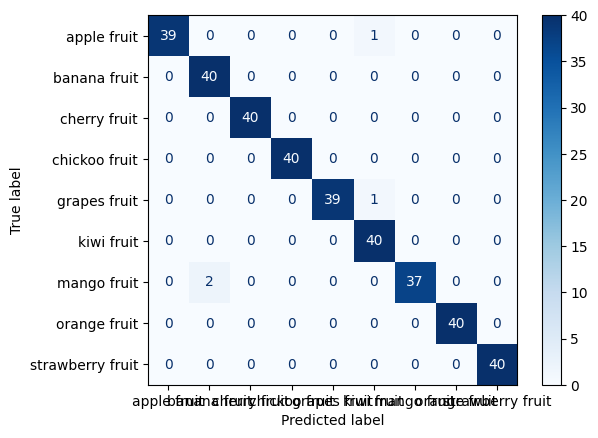

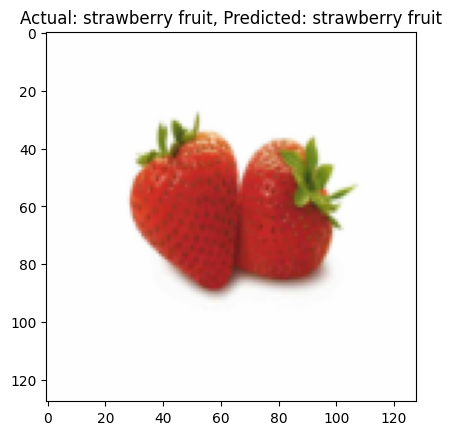

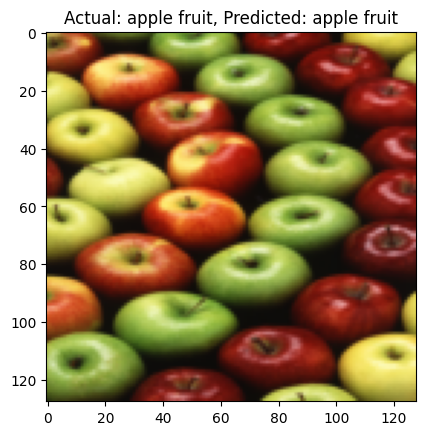

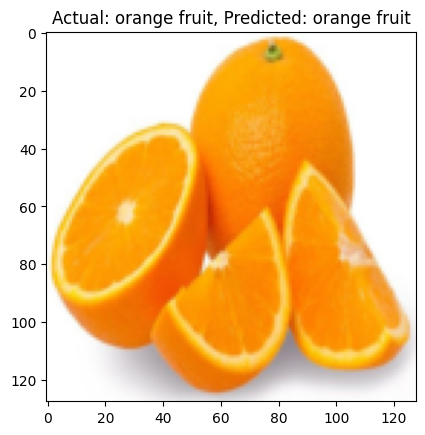

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import random

def test_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    indices = random.sample(range(len(dataset)), 3)
    for i in indices:
        image, label = dataset[i]
        image = image.unsqueeze(0).to(device)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        predicted_label = predicted.item()
        plt.imshow(image.cpu().squeeze().permute(1, 2, 0))
        plt.title(f"Actual: {class_names[label]}, Predicted: {class_names[predicted_label]}")
        plt.show()

test_model(model, data_loader)


In [52]:
import torch
import torch.nn.functional as F
import numpy as np
from scipy.optimize import differential_evolution
from tqdm import tqdm

def one_pixel_attack(image, label, model, bounds, maxiter=20):
    def perturb_pixel(pixel):
        perturbed_image = image.clone()
        perturbed_image[0, :, int(pixel[0]), int(pixel[1])] = torch.tensor(pixel[2:], device=image.device)
        with torch.no_grad():
            output = model(perturbed_image)
        loss = -F.cross_entropy(output, torch.tensor([label], device=image.device))
        return loss.item()
    
    result = differential_evolution(perturb_pixel, bounds=bounds, maxiter=maxiter, popsize=10)
    return result.x

bounds = [(0, 127), (0, 127), (0, 1), (0, 1), (0, 1)]  

model.eval()

dog_breeds_attacked = []
patch_data = []

batch_size = 32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

for batch_idx, (images, labels) in tqdm(enumerate(dataloader), total=len(dataloader), desc="Attacking images"):
    images = images.to(device)
    labels = labels.to(device)
    
    for i in range(images.size(0)):
        image = images[i].unsqueeze(0)
        label = labels[i]
        
        pixel = one_pixel_attack(image, label, model, bounds)
        attacked_image = image.clone()
        attacked_image[0, :, int(pixel[0]), int(pixel[1])] = torch.tensor(pixel[2:], device=image.device)
        
        dog_breeds_attacked.append((attacked_image.cpu().squeeze(), label.item()))
        
        patch_size = 16
        for row in range(0, 128, patch_size):
            for col in range(0, 128, patch_size):
                patch = attacked_image[:, :, row:row+patch_size, col:col+patch_size]
                patch_id = f"[{batch_idx * batch_size + i}][{row//patch_size * 8 + col//patch_size}]"
                attacked_or_not = 1 if (row <= pixel[0] < row + patch_size and col <= pixel[1] < col + patch_size) else 0
                patch_data.append((patch.cpu().squeeze(), patch_id, attacked_or_not))

torch.save(dog_breeds_attacked, 'animals-attacked.pt')
torch.save(patch_data, 'Patch-data.pt')


Attacking images: 100%|██████████| 12/12 [08:17<00:00, 41.49s/it]


In [53]:
import torch

dog_breeds_attacked = torch.load('animals-attacked.pt')
patch_data = torch.load('Patch-data.pt')
dataset = datasets.ImageFolder(root='dog-breeds', transform=transform)

num_attacked_samples = len(dog_breeds_attacked)
num_patch_samples = len(patch_data)
num_originl_samples = len(dataset)

print(f'Total number of samples in animals-attacked.pt: {num_attacked_samples}')
print(f'Total number of samples in Patch-data.pt: {num_patch_samples}')
print(f'Total number of samples in original dataset: {num_originl_samples}')


Total number of samples in animals-attacked.pt: 359
Total number of samples in Patch-data.pt: 22976
Total number of samples in original dataset: 967


Testing attacked dataset:   0%|          | 0/359 [00:00<?, ?it/s]

Testing attacked dataset: 100%|██████████| 359/359 [00:00<00:00, 505.08it/s]


Accuracy: 99.44%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      1.00      0.98        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      0.95      0.97        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359



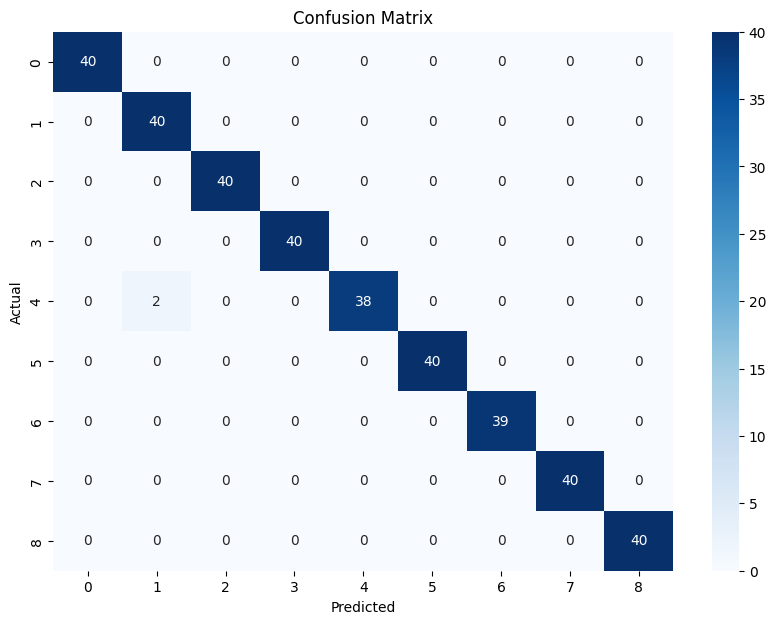

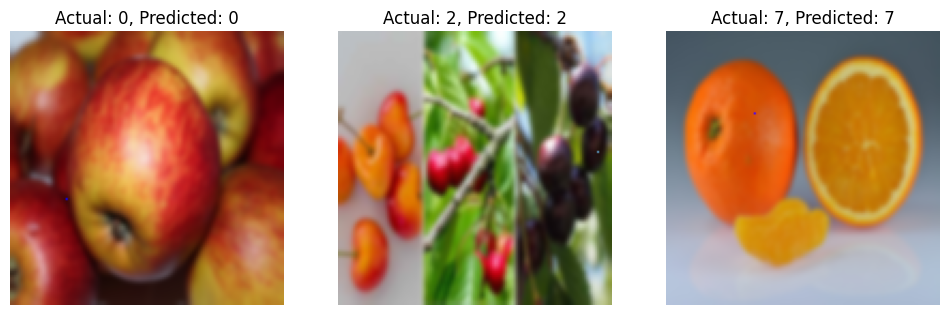

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

dog_breeds_attacked = torch.load('animals-attacked.pt')

model.eval()

all_preds = []
all_labels = []
loss_fn = torch.nn.CrossEntropyLoss()

with torch.no_grad():
    for attacked_image, label in tqdm(dog_breeds_attacked, desc="Testing attacked dataset"):
        attacked_image = attacked_image.unsqueeze(0).to(device)
        label = torch.tensor(label).to(device)  
        
        output = model(attacked_image)
        loss = loss_fn(output, label.unsqueeze(0))  
        
        _, predicted = torch.max(output, 1)
        
        all_preds.append(predicted.item())
        all_labels.append(label.item())

accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("Classification Report:")
print(classification_report(all_labels, all_preds))

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


random_indices = np.random.choice(len(dog_breeds_attacked), size=3, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    attacked_image, label = dog_breeds_attacked[idx]
    attacked_image = attacked_image.permute(1, 2, 0) 
    attacked_image = attacked_image.numpy()

    predicted = all_preds[idx]
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(attacked_image)
    plt.title(f'Actual: {label}, Predicted: {predicted}')
    plt.axis('off')

plt.show()


Class Label: 0


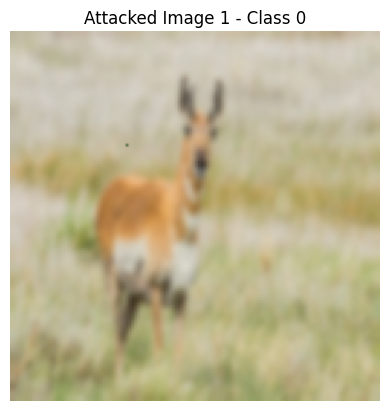

Class Label: 0


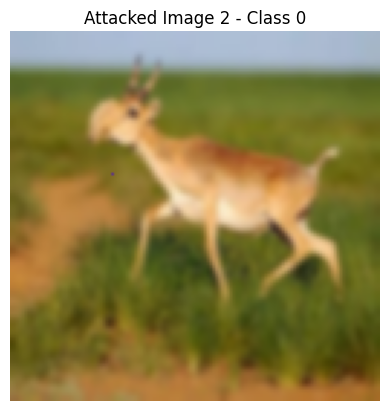

Class Label: 0


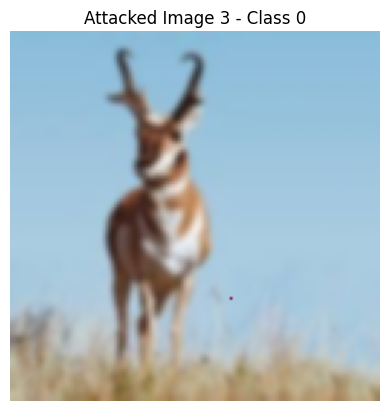

torch.Size([3, 128, 128])

In [9]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

dog_breeds_attacked = torch.load('animals-attacked.pt')

def show_image(image_tensor, title=""):
    image = image_tensor.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


for i in range(3): 
    attacked_image, label = dog_breeds_attacked[i]
    print(f"Class Label: {label}")
    show_image(attacked_image, title=f"Attacked Image {i+1} - Class {label}")
attacked_image.shape



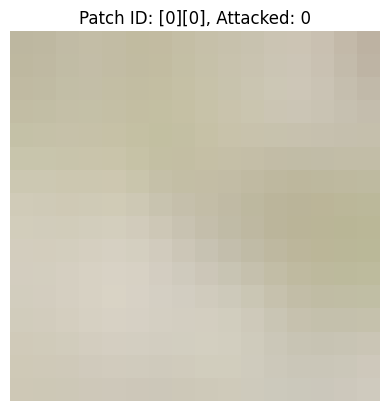

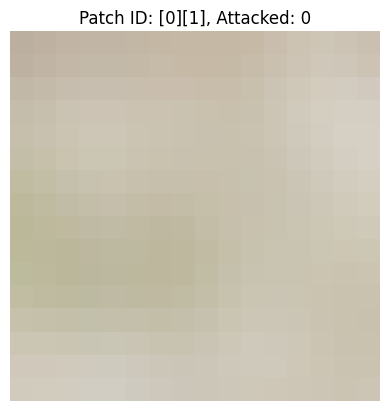

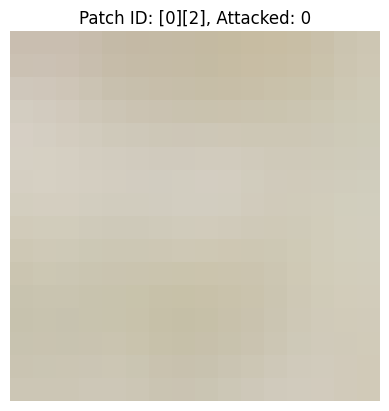

In [10]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


patch_data = torch.load('Patch-data.pt')


def show_patch(patch_tensor, patch_id, attacked_or_not):
    patch = patch_tensor.squeeze(0)  
    patch = transforms.ToPILImage()(patch) 
    plt.imshow(patch)
    title = f"Patch ID: {patch_id}, Attacked: {attacked_or_not}"
    plt.title(title)
    plt.axis('off')
    plt.show()

for i in range(3):  
    patch_tensor, patch_id, attacked_or_not = patch_data[i]
    show_patch(patch_tensor, patch_id, attacked_or_not)
patch_tensor, _, _ = patch_data[0]


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torch.nn.functional as F

class PatchCNN(nn.Module):
    def __init__(self):
        super(PatchCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 128) 
        self.fc2 = nn.Linear(128, 2) 

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return x

class PatchDataset(Dataset):
    def __init__(self, patch_data):
        self.patches = patch_data

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        patch, patch_id, attacked_or_not = self.patches[idx]
        return patch.float(), attacked_or_not  

patch_data = torch.load('Patch-data.pt')
dataset = PatchDataset(patch_data)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(total=len(data_loader), desc=f'Epoch {epoch + 1}/{num_epochs}') as pbar:
        for patches, labels in data_loader:
            patches, labels = patches.to(device), labels.to(device)

            outputs = model(patches)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix(loss=running_loss / (pbar.n + 1), accuracy=correct / total)
            pbar.update(1)

    avg_loss = running_loss / len(data_loader)
    accuracy = correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')




Epoch 1/10: 100%|██████████| 10800/10800 [01:00<00:00, 179.85it/s, accuracy=0.99, loss=0.0483]


Epoch [1/10], Loss: 0.0483, Accuracy: 99.03%


Epoch 2/10: 100%|██████████| 10800/10800 [01:02<00:00, 172.48it/s, accuracy=0.998, loss=0.00984]


Epoch [2/10], Loss: 0.0098, Accuracy: 99.80%


Epoch 3/10: 100%|██████████| 10800/10800 [01:02<00:00, 171.51it/s, accuracy=0.999, loss=0.00665]


Epoch [3/10], Loss: 0.0067, Accuracy: 99.87%


Epoch 4/10: 100%|██████████| 10800/10800 [01:03<00:00, 171.27it/s, accuracy=0.999, loss=0.00585]


Epoch [4/10], Loss: 0.0059, Accuracy: 99.89%


Epoch 5/10: 100%|██████████| 10800/10800 [01:02<00:00, 173.57it/s, accuracy=0.999, loss=0.00527]


Epoch [5/10], Loss: 0.0053, Accuracy: 99.90%


Epoch 6/10: 100%|██████████| 10800/10800 [01:01<00:00, 174.78it/s, accuracy=0.999, loss=0.00418]


Epoch [6/10], Loss: 0.0042, Accuracy: 99.92%


Epoch 7/10: 100%|██████████| 10800/10800 [01:02<00:00, 172.35it/s, accuracy=0.999, loss=0.00402]


Epoch [7/10], Loss: 0.0040, Accuracy: 99.93%


Epoch 8/10: 100%|██████████| 10800/10800 [01:02<00:00, 173.08it/s, accuracy=0.999, loss=0.00325]


Epoch [8/10], Loss: 0.0032, Accuracy: 99.94%


Epoch 9/10: 100%|██████████| 10800/10800 [01:02<00:00, 172.70it/s, accuracy=0.999, loss=0.00375]


Epoch [9/10], Loss: 0.0037, Accuracy: 99.94%


Epoch 10/10: 100%|██████████| 10800/10800 [01:03<00:00, 170.28it/s, accuracy=1, loss=0.00309]  

Epoch [10/10], Loss: 0.0031, Accuracy: 99.95%


In [12]:
torch.save(model.state_dict(), 'patchCNN.pt')

# **DIFFERENCE MAP REPAIR**

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))  

dog_breeds_attacked = torch.load('animals-attacked.pt')

def detect_attacked_patch(image):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            patch = patch.to(device)
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

def calculate_difference_map(patch):
    difference_map = torch.zeros(patch.shape[2:]).to(device)
    for i in range(0, patch.shape[2]):
        for j in range(0, patch.shape[3]):
            center_pixel = patch[:, :, i, j]
            neighbors = []
            if i > 0: neighbors.append(patch[:, :, i-1, j])
            if i < patch.shape[2] - 1: neighbors.append(patch[:, :, i+1, j])
            if j > 0: neighbors.append(patch[:, :, i, j-1])
            if j < patch.shape[3] - 1: neighbors.append(patch[:, :, i, j+1])
            
            if neighbors:
                neighbors = torch.stack(neighbors)
                avg_neighbor = torch.mean(neighbors, dim=0)
                difference_map[i, j] = torch.sum(torch.abs(center_pixel - avg_neighbor))
    return difference_map

def create_average_map(patch):
    avg_map = torch.zeros_like(patch).to(device)

    for i in range(0, patch.shape[2]):
        for j in range(0, patch.shape[3]):
            neighbors = []
            if i > 0: neighbors.append(patch[:, :, i-1, j])
            if i < patch.shape[2] - 1: neighbors.append(patch[:, :, i+1, j])
            if j > 0: neighbors.append(patch[:, :, i, j-1])
            if j < patch.shape[3] - 1: neighbors.append(patch[:, :, i, j+1])
            
            if neighbors:
                neighbors = torch.stack(neighbors)
                avg_pixel = torch.mean(neighbors, dim=0)
                avg_map[:, :, i, j] = avg_pixel

    return avg_map

def repair_patch(patch):
    difference_map = calculate_difference_map(patch)
    average_map = create_average_map(patch)

    max_diff_idx = torch.argmax(difference_map)
    max_diff_pos = torch.unravel_index(max_diff_idx, difference_map.shape)

    repaired_patch = patch.clone()
    repaired_patch[:, :, max_diff_pos[0], max_diff_pos[1]] = average_map[:, :, max_diff_pos[0], max_diff_pos[1]]

    return repaired_patch

repaired_images = []

for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
    attacked_image = attacked_image.unsqueeze(0).to(device) 
    
    attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image)
    
    repaired_patch = repair_patch(attacked_patch)
    
    row = (attacked_patch_index // 8) * 16
    col = (attacked_patch_index % 8) * 16
    attacked_image[:, :, row:row + 16, col:col + 16] = repaired_patch
    
    repaired_images.append((attacked_image.cpu(), label))

torch.save(repaired_images, 'repaired_images.pt')




Repairing images: 100%|██████████| 5400/5400 [12:24<00:00,  7.25it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.40      0.31        60
           1       0.31      0.17      0.22        60
           2       0.46      0.18      0.26        60
           3       0.50      0.23      0.32        60
           4       0.09      0.40      0.14        60
           5       0.42      0.25      0.31        60
           6       0.26      0.37      0.31        60
           7       0.33      0.28      0.30        60
           8       0.50      0.23      0.32        60
           9       0.21      0.38      0.27        60
          10       0.39      0.30      0.34        60
          11       0.46      0.22      0.30        60
          12       0.23      0.40      0.29        60
          13       0.64      0.23      0.34        60
          14       0.31      0.32      0.31        60
          15       0.35      0.32      0.33        60
          16       0.35      0.30      0.32        60
    

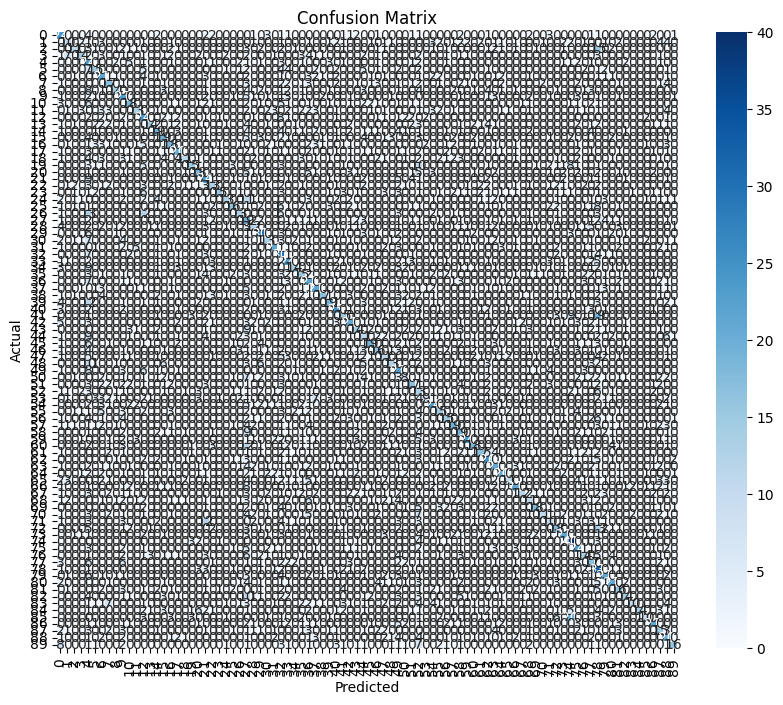

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the repaired images
repaired_images = torch.load('repaired_images.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in repaired_images:
        repaired_image = repaired_image.squeeze(0).to(device)  # Remove any unnecessary dimensions
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)  # Append label directly
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

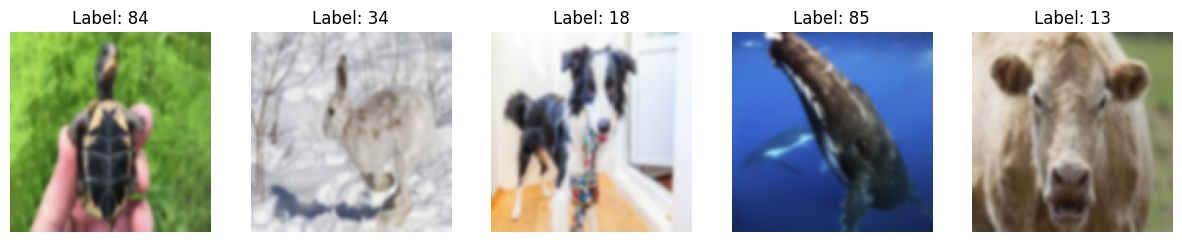

In [15]:
import torch
import matplotlib.pyplot as plt
import random

# Load the repaired images
repaired_images = torch.load('repaired_images.pt')

# Number of images to display
num_images_to_display = 5

# Randomly select images and labels
random_indices = random.sample(range(len(repaired_images)), num_images_to_display)

# Set up the plot
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

for ax, idx in zip(axes, random_indices):
    repaired_image, label = repaired_images[idx]
    
    # Remove the batch dimension
    repaired_image = repaired_image.squeeze(0) 
    repaired_image = repaired_image.permute(1, 2, 0) 
    
    # Display the image and its label
    ax.imshow(repaired_image.cpu().numpy())
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide axes ticks

plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.40      0.31        60
           1       0.31      0.17      0.22        60
           2       0.46      0.18      0.26        60
           3       0.50      0.23      0.32        60
           4       0.09      0.40      0.14        60
           5       0.42      0.25      0.31        60
           6       0.26      0.37      0.31        60
           7       0.33      0.28      0.30        60
           8       0.50      0.23      0.32        60
           9       0.21      0.38      0.27        60
          10       0.39      0.30      0.34        60
          11       0.46      0.22      0.30        60
          12       0.23      0.40      0.29        60
          13       0.64      0.23      0.34        60
          14       0.31      0.32      0.31        60
          15       0.35      0.32      0.33        60
          16       0.35      0.30      0.32        60
    

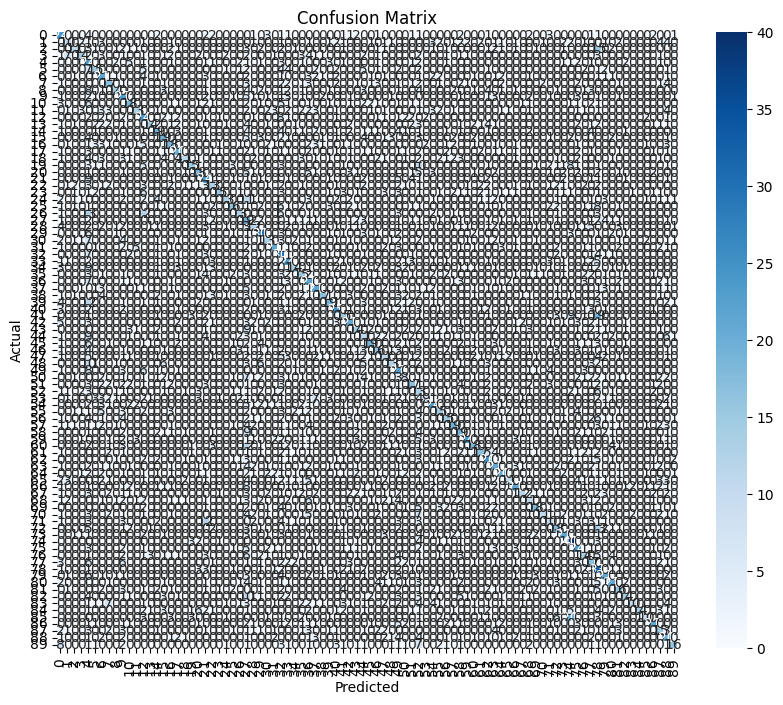

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the repaired images
repaired_images = torch.load('repaired_images.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in repaired_images:
        repaired_image = repaired_image.squeeze(0).to(device)  # Remove any unnecessary dimensions
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)  # Append label directly
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **MEDIAN REPAIR**

In [17]:
import torch
import torch.nn.functional as F
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))

dog_breeds_attacked = torch.load('animals-attacked.pt')

def detect_attacked_patch(image):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            patch = patch.to(device)
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  # Assuming class 1 is the attacked class

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

def median_filter(patch):
    """
    Apply median filter to a patch.
    """
    repaired_patch = patch.clone()
    patch_size = patch.shape[2]

    # Loop over each pixel in the patch
    for i in range(1, patch_size - 1):  # Ignore edges for simplicity
        for j in range(1, patch_size - 1):
            # Get the 3x3 neighborhood of the pixel
            neighborhood = patch[:, :, i-1:i+2, j-1:j+2].reshape(-1, 3)  # Use reshape instead of view
            # Compute median across the neighborhood
            median_pixel = torch.median(neighborhood, dim=0).values
            # Replace the pixel with the median value
            repaired_patch[:, :, i, j] = median_pixel

    return repaired_patch


def repair_patch(patch):
    """
    Repair the patch using a median filter.
    """
    return median_filter(patch)

repaired_images = []

for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
    attacked_image = attacked_image.unsqueeze(0).to(device)
    
    # Detect the attacked patch
    attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image)
    
    # Repair the attacked patch using the median filter
    repaired_patch = repair_patch(attacked_patch)
    
    # Put the repaired patch back in the image
    row = (attacked_patch_index // 8) * 16
    col = (attacked_patch_index % 8) * 16
    attacked_image[:, :, row:row + 16, col:col + 16] = repaired_patch
    
    # Add the repaired image to the list
    repaired_images.append((attacked_image.cpu(), label))

# Save the repaired images
torch.save(repaired_images, 'repaired_images.pt')


Repairing images: 100%|██████████| 5400/5400 [07:04<00:00, 12.71it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.40      0.31        60
           1       0.33      0.17      0.22        60
           2       0.48      0.18      0.27        60
           3       0.50      0.23      0.32        60
           4       0.09      0.40      0.14        60
           5       0.42      0.25      0.31        60
           6       0.27      0.37      0.31        60
           7       0.32      0.28      0.30        60
           8       0.47      0.23      0.31        60
           9       0.21      0.38      0.28        60
          10       0.41      0.32      0.36        60
          11       0.48      0.22      0.30        60
          12       0.22      0.40      0.29        60
          13       0.58      0.23      0.33        60
          14       0.32      0.32      0.32        60
          15       0.33      0.32      0.32        60
          16       0.36      0.30      0.33        60
    

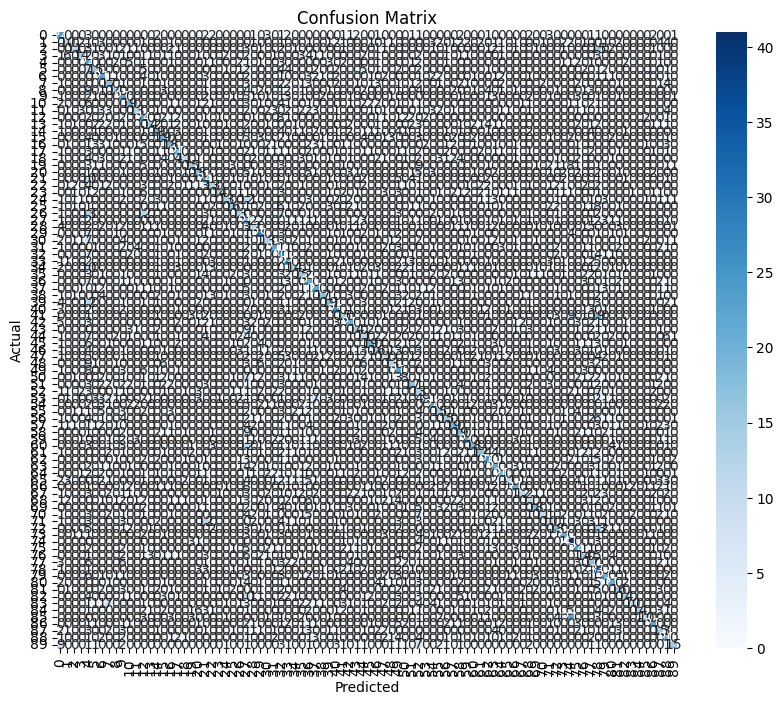

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the repaired images
repaired_images = torch.load('repaired_images.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in repaired_images:
        repaired_image = repaired_image.squeeze(0).to(device)  # Remove any unnecessary dimensions
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)  # Append label directly
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **GAUSSIAN FILTERS**

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from scipy.ndimage import gaussian_filter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))  

dog_breeds_attacked = torch.load('animals-attacked.pt')

def detect_attacked_patch(image):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            patch = patch.to(device)
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

def calculate_difference_map(patch):
    difference_map = torch.zeros(patch.shape[2:]).to(device)
    for i in range(0, patch.shape[2]):
        for j in range(0, patch.shape[3]):
            center_pixel = patch[:, :, i, j]
            neighbors = []
            if i > 0: neighbors.append(patch[:, :, i-1, j])
            if i < patch.shape[2] - 1: neighbors.append(patch[:, :, i+1, j])
            if j > 0: neighbors.append(patch[:, :, i, j-1])
            if j < patch.shape[3] - 1: neighbors.append(patch[:, :, i, j+1])
            
            if neighbors:
                neighbors = torch.stack(neighbors)
                avg_neighbor = torch.mean(neighbors, dim=0)
                difference_map[i, j] = torch.sum(torch.abs(center_pixel - avg_neighbor))
    return difference_map

def create_average_map(patch):
    avg_map = torch.zeros_like(patch).to(device)

    for i in range(0, patch.shape[2]):
        for j in range(0, patch.shape[3]):
            neighbors = []
            if i > 0: neighbors.append(patch[:, :, i-1, j])
            if i < patch.shape[2] - 1: neighbors.append(patch[:, :, i+1, j])
            if j > 0: neighbors.append(patch[:, :, i, j-1])
            if j < patch.shape[3] - 1: neighbors.append(patch[:, :, i, j+1])
            
            if neighbors:
                neighbors = torch.stack(neighbors)
                avg_pixel = torch.mean(neighbors, dim=0)
                avg_map[:, :, i, j] = avg_pixel

    return avg_map

def gaussian_smoothing(patch, sigma=1.0):
    """
    Apply Gaussian smoothing to a patch using scipy's gaussian_filter.
    
    Parameters:
    - patch: the input image patch (Tensor)
    - sigma: the standard deviation of the Gaussian kernel
    
    Returns:
    - smoothed_patch: the smoothed image patch
    """
    # Move the patch to CPU and convert it to a numpy array
    patch_np = patch.cpu().numpy()
    
    # Apply Gaussian smoothing using scipy
    smoothed_patch_np = np.zeros_like(patch_np)
    for i in range(patch_np.shape[1]):
        smoothed_patch_np[:, i, :, :] = gaussian_filter(patch_np[:, i, :, :], sigma=sigma)
    
    # Convert the numpy array back to a PyTorch tensor
    smoothed_patch = torch.tensor(smoothed_patch_np, dtype=patch.dtype, device=patch.device)
    
    return smoothed_patch

def repair_patch(patch):
    difference_map = calculate_difference_map(patch)
    average_map = create_average_map(patch)

    max_diff_idx = torch.argmax(difference_map)
    max_diff_pos = torch.unravel_index(max_diff_idx, difference_map.shape)

    repaired_patch = patch.clone()
    
    # Apply Gaussian smoothing to the entire patch
    smoothed_patch = gaussian_smoothing(repaired_patch)
    
    # Use the smoothed pixel value for the most differing pixel
    repaired_patch[:, :, max_diff_pos[0], max_diff_pos[1]] = smoothed_patch[:, :, max_diff_pos[0], max_diff_pos[1]]

    return repaired_patch

repaired_images = []

for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
    attacked_image = attacked_image.unsqueeze(0).to(device) 
    
    attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image)
    
    repaired_patch = repair_patch(attacked_patch)
    
    row = (attacked_patch_index // 8) * 16
    col = (attacked_patch_index % 8) * 16
    attacked_image[:, :, row:row + 16, col:col + 16] = repaired_patch
    
    repaired_images.append((attacked_image.cpu(), label))

torch.save(repaired_images, 'repaired_images.pt')


Repairing images: 100%|██████████| 5400/5400 [12:29<00:00,  7.20it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.40      0.31        60
           1       0.31      0.17      0.22        60
           2       0.46      0.18      0.26        60
           3       0.50      0.23      0.32        60
           4       0.09      0.40      0.14        60
           5       0.42      0.25      0.31        60
           6       0.26      0.37      0.31        60
           7       0.33      0.28      0.30        60
           8       0.50      0.23      0.32        60
           9       0.21      0.38      0.27        60
          10       0.39      0.30      0.34        60
          11       0.46      0.22      0.30        60
          12       0.23      0.40      0.29        60
          13       0.64      0.23      0.34        60
          14       0.31      0.32      0.31        60
          15       0.35      0.32      0.33        60
          16       0.35      0.30      0.32        60
    

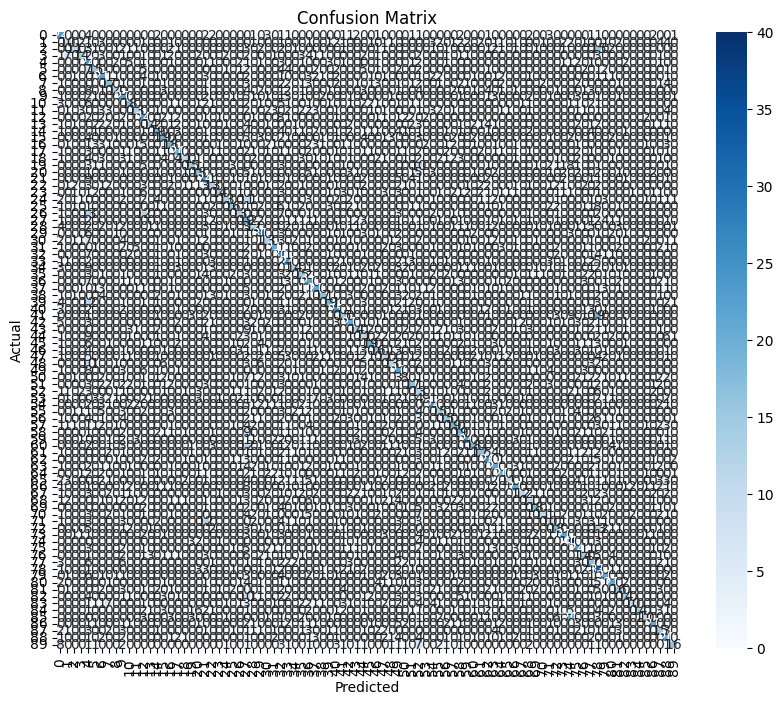

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the repaired images
repaired_images = torch.load('repaired_images.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in repaired_images:
        repaired_image = repaired_image.squeeze(0).to(device)  # Remove any unnecessary dimensions
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)  # Append label directly
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **BILATERAL FILTERING**

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from tqdm import tqdm
import cv2
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))  

dog_breeds_attacked = torch.load('animals-attacked.pt')

def detect_attacked_patch(image):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            patch = patch.to(device)
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

def calculate_difference_map(patch):
    difference_map = torch.zeros(patch.shape[2:]).to(device)
    for i in range(0, patch.shape[2]):
        for j in range(0, patch.shape[3]):
            center_pixel = patch[:, :, i, j]
            neighbors = []
            if i > 0: neighbors.append(patch[:, :, i-1, j])
            if i < patch.shape[2] - 1: neighbors.append(patch[:, :, i+1, j])
            if j > 0: neighbors.append(patch[:, :, i, j-1])
            if j < patch.shape[3] - 1: neighbors.append(patch[:, :, i, j+1])
            
            if neighbors:
                neighbors = torch.stack(neighbors)
                avg_neighbor = torch.mean(neighbors, dim=0)
                difference_map[i, j] = torch.sum(torch.abs(center_pixel - avg_neighbor))
    return difference_map

def create_average_map(patch):
    avg_map = torch.zeros_like(patch).to(device)

    for i in range(0, patch.shape[2]):
        for j in range(0, patch.shape[3]):
            neighbors = []
            if i > 0: neighbors.append(patch[:, :, i-1, j])
            if i < patch.shape[2] - 1: neighbors.append(patch[:, :, i+1, j])
            if j > 0: neighbors.append(patch[:, :, i, j-1])
            if j < patch.shape[3] - 1: neighbors.append(patch[:, :, i, j+1])
            
            if neighbors:
                neighbors = torch.stack(neighbors)
                avg_pixel = torch.mean(neighbors, dim=0)
                avg_map[:, :, i, j] = avg_pixel

    return avg_map

def bilateral_filtering(patch, d=5, sigma_color=75, sigma_space=75):
    """
    Apply bilateral filtering to a patch using OpenCV.
    
    Parameters:
    - patch: the input image patch (Tensor)
    - d: Diameter of each pixel neighborhood
    - sigma_color: Filter sigma in the color space
    - sigma_space: Filter sigma in the coordinate space
    
    Returns:
    - filtered_patch: the patch after bilateral filtering
    """
    patch_np = patch.squeeze(0).cpu().numpy()  # Convert to NumPy and remove batch dimension
    filtered_patch_np = np.zeros_like(patch_np)

    # Apply bilateral filtering to each channel separately
    for c in range(patch_np.shape[0]):
        filtered_patch_np[c] = cv2.bilateralFilter(patch_np[c], d=d, sigmaColor=sigma_color, sigmaSpace=sigma_space)
    
    filtered_patch = torch.from_numpy(filtered_patch_np).to(device).unsqueeze(0)  # Convert back to tensor and add batch dim
    return filtered_patch

def repair_patch(patch):
    difference_map = calculate_difference_map(patch)
    average_map = create_average_map(patch)

    max_diff_idx = torch.argmax(difference_map)
    max_diff_pos = torch.unravel_index(max_diff_idx, difference_map.shape)

    repaired_patch = patch.clone()
    
    # Apply bilateral filtering to the entire patch
    smoothed_patch = bilateral_filtering(repaired_patch)
    
    # Use the filtered pixel value for the most differing pixel
    repaired_patch[:, :, max_diff_pos[0], max_diff_pos[1]] = smoothed_patch[:, :, max_diff_pos[0], max_diff_pos[1]]

    return repaired_patch

repaired_images = []

for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
    attacked_image = attacked_image.unsqueeze(0).to(device) 
    
    attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image)
    
    repaired_patch = repair_patch(attacked_patch)
    
    row = (attacked_patch_index // 8) * 16
    col = (attacked_patch_index % 8) * 16
    attacked_image[:, :, row:row + 16, col:col + 16] = repaired_patch
    
    repaired_images.append((attacked_image.cpu(), label))

torch.save(repaired_images, 'repaired_images.pt')


Repairing images: 100%|██████████| 5400/5400 [12:28<00:00,  7.22it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.40      0.31        60
           1       0.31      0.17      0.22        60
           2       0.46      0.18      0.26        60
           3       0.50      0.23      0.32        60
           4       0.09      0.40      0.14        60
           5       0.42      0.25      0.31        60
           6       0.26      0.37      0.31        60
           7       0.33      0.28      0.30        60
           8       0.50      0.23      0.32        60
           9       0.21      0.38      0.27        60
          10       0.39      0.30      0.34        60
          11       0.46      0.22      0.30        60
          12       0.23      0.40      0.29        60
          13       0.64      0.23      0.34        60
          14       0.31      0.32      0.31        60
          15       0.35      0.32      0.33        60
          16       0.35      0.30      0.32        60
    

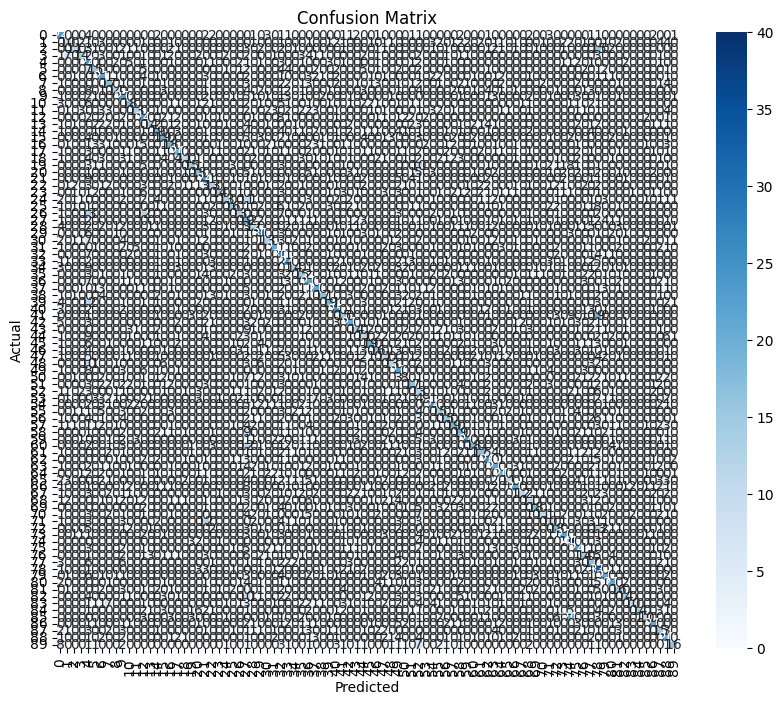

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the repaired images
repaired_images = torch.load('repaired_images.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in repaired_images:
        repaired_image = repaired_image.squeeze(0).to(device)  # Remove any unnecessary dimensions
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)  # Append label directly
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import numpy as np

# Repair algorithm functions
def color_difference(a, b):
    return torch.abs(a[0] - b[0]) + torch.abs(a[1] - b[1]) + torch.abs(a[2] - b[2])

def generate_difference_map(patch):
    lambda_map = torch.zeros((16, 16), device=patch.device)
    ct = 125 / 255.0  # color threshold, normalized to 0-1 range

    for i in range(16):
        for j in range(16):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 16 and 0 <= nj < 16:
                        neighbors.append(patch[:, ni, nj])
            
            diff_count = sum(color_difference(patch[:, i, j], neighbor) > ct for neighbor in neighbors)
            lambda_map[i, j] = diff_count / len(neighbors) * 10

    return lambda_map

def generate_average_map(patch, lambda_map):
    epsilon_map = torch.zeros((16, 16, 3), device=patch.device)
    at = 9  # average threshold

    for i in range(16):
        for j in range(16):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 16 and 0 <= nj < 16 and lambda_map[ni, nj] < at:
                        neighbors.append(patch[:, ni, nj])
            
            if neighbors:
                epsilon_map[i, j] = torch.stack(neighbors).mean(dim=0)
            else:
                epsilon_map[i, j] = patch[:, i, j]

    return epsilon_map

def reconstruct_patch(patch, lambda_map, epsilon_map):
    rt = 8  # replacement threshold
    reconstructed_patch = patch.clone()

    for i in range(16):
        for j in range(16):
            if lambda_map[i, j] > rt:
                reconstructed_patch[:, i, j] = epsilon_map[i, j]

    return reconstructed_patch

def repair_patch(patch):
    lambda_map = generate_difference_map(patch)
    epsilon_map = generate_average_map(patch, lambda_map)
    return reconstruct_patch(patch, lambda_map, epsilon_map)

def detect_attacked_patch(image, model):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

def repair_images(dog_breeds_attacked, model, device):
    repaired_images = []

    for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
        attacked_image = attacked_image.to(device)
        
        attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image.unsqueeze(0), model)
        
        repaired_patch = repair_patch(attacked_patch.squeeze(0))
        
        row = (attacked_patch_index // 8) * 16
        col = (attacked_patch_index % 8) * 16
        attacked_image[:, row:row + 16, col:col + 16] = repaired_patch
        
        repaired_images.append((attacked_image.cpu(), label))

    return repaired_images


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))

# Load attacked images
dog_breeds_attacked = torch.load('animals-attacked.pt')

# Repair images
repaired_images = repair_images(dog_breeds_attacked, model, device)

# Load the classifier model
num_classes = len(class_names)

classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in tqdm(repaired_images, desc="Evaluating repaired images"):
        repaired_image = repaired_image.unsqueeze(0).to(device)
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display 5 random repaired images with predicted and actual classes, alongside the attacked images
random_indices = random.sample(range(len(repaired_images)), 5)

for idx in random_indices:
    attacked_image, label = dog_breeds_attacked[idx]
    repaired_image, _ = repaired_images[idx]
    
    attacked_image_np = attacked_image.cpu().numpy().transpose(1, 2, 0)
    repaired_image_np = repaired_image.cpu().numpy().transpose(1, 2, 0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(attacked_image_np)
    ax1.set_title("Attacked Image")
    ax1.axis('off')
    
    ax2.imshow(repaired_image_np)
    ax2.set_title(f"Repaired Image\nActual: {label}, Predicted: {predicted_labels[idx]}")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()


Repairing images: 100%|██████████| 5400/5400 [1:54:41<00:00,  1.27s/it]  


RuntimeError: Error(s) in loading state_dict for SimpleCNN:
	size mismatch for fc2.weight: copying a param with shape torch.Size([90, 512]) from checkpoint, the shape in current model is torch.Size([9, 512]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([90]) from checkpoint, the shape in current model is torch.Size([9]).

In [ ]:
"""import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2
import numpy as np
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))

# Load attacked images
dog_breeds_attacked = torch.load('animals-attacked.pt')

import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

def poisson_editing(patch, smoothed_patch):
    patch_np = patch.squeeze(0).cpu().numpy()
    smoothed_patch_np = smoothed_patch.squeeze(0).cpu().numpy()

    # Check if the patch is grayscale (1-channel) or color (3-channel)
    if patch_np.shape[0] == 1:  # Grayscale image
        # Normalize the patch
        smoothed_patch_np = smoothed_patch_np[0] / 255.0
        
        # Apply Poisson editing
        edited_patch_np = cv2.detailEnhance(smoothed_patch_np, sigma_s=10, sigma_r=0.15) * 255
        edited_patch_np = np.expand_dims(edited_patch_np, axis=0)  # Add channel dimension back
        
        # Debugging: Display images
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title('Original Patch')
        plt.imshow(patch_np[0], cmap='gray')
        plt.subplot(1, 3, 2)
        plt.title('Smoothed Patch')
        plt.imshow(smoothed_patch_np, cmap='gray')
        plt.subplot(1, 3, 3)
        plt.title('Edited Patch')
        plt.imshow(edited_patch_np[0], cmap='gray')
        plt.show()
        
    elif patch_np.shape[0] == 3:  # Color image (3-channel)
        # Normalize the patch
        smoothed_patch_np = smoothed_patch_np.transpose(1, 2, 0) / 255.0
        
        # Apply Poisson editing
        edited_patch_np = cv2.detailEnhance(smoothed_patch_np, sigma_s=10, sigma_r=0.15) * 255
        edited_patch_np = edited_patch_np.transpose(2, 0, 1)  # Convert back to channel-first format
        
        # Debugging: Display images
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title('Original Patch')
        plt.imshow(patch_np.transpose(1, 2, 0))
        plt.subplot(1, 3, 2)
        plt.title('Smoothed Patch')
        plt.imshow(smoothed_patch_np)
        plt.subplot(1, 3, 3)
        plt.title('Edited Patch')
        plt.imshow(edited_patch_np.transpose(1, 2, 0))
        plt.show()

    # Convert back to torch tensor and add batch dimension
    edited_patch = torch.from_numpy(edited_patch_np).to(device).unsqueeze(0)
    return edited_patch

def bilateral_filtering(patch, d=5, sigma_color=75, sigma_space=75):
    patch_np = patch.squeeze(0).cpu().numpy()  # Convert to NumPy and remove batch dimension
    filtered_patch_np = np.zeros_like(patch_np)

    for c in range(patch_np.shape[0]):
        # Normalize each channel before filtering
        channel_np = patch_np[c] / 255.0
        filtered_patch_np[c] = cv2.bilateralFilter(channel_np, d=d, sigmaColor=sigma_color, sigmaSpace=sigma_space) * 255

    filtered_patch = torch.from_numpy(filtered_patch_np).to(device).unsqueeze(0)  # Convert back to tensor and add batch dim
    return filtered_patch


# Function to repair the patch and apply Poisson editing
def repair_patch_with_poisson(patch):
    smoothed_patch = bilateral_filtering(patch)
    edited_patch = poisson_editing(patch, smoothed_patch)
    return edited_patch

# Detect attacked patch function (same as original)
def detect_attacked_patch(image):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            patch = patch.to(device)
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]

# Main loop for repairing images
repaired_images = []

for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
    attacked_image = attacked_image.unsqueeze(0).to(device) 
    
    attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image)
    
    repaired_patch = repair_patch_with_poisson(attacked_patch)
    
    row = (attacked_patch_index // 8) * 16
    col = (attacked_patch_index % 8) * 16
    attacked_image[:, :, row:row + 16, col:col + 16] = repaired_patch
    
    repaired_images.append((attacked_image.cpu(), label))

torch.save(repaired_images, 'repaired_images.pt')

# Load the classifier model
classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in repaired_images:
        repaired_image = repaired_image.squeeze(0).to(device)
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display 5 random repaired images with predicted and actual classes
random_indices = random.sample(range(len(repaired_images)), 5)

for i in random_indices:
    repaired_image, label = repaired_images[i]
    repaired_image_np = repaired_image.squeeze(0).cpu().numpy().transpose(1, 2, 0)
    
    plt.imshow(repaired_image_np)
    plt.title(f"Actual: {label}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show() """
    
    
print("Comments")



Comments


Class Label: 1


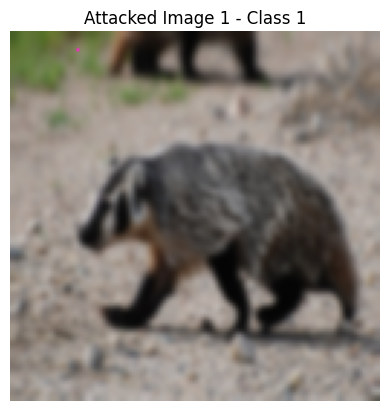

Class Label: 1


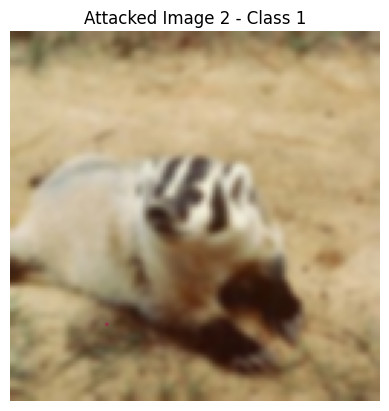

Class Label: 1


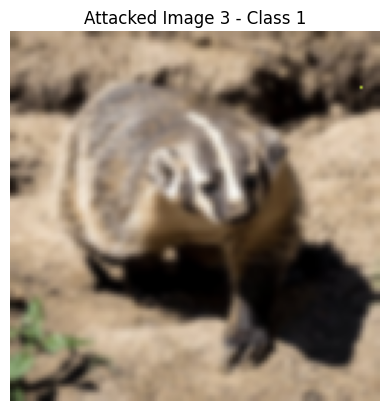

Class Label: 1


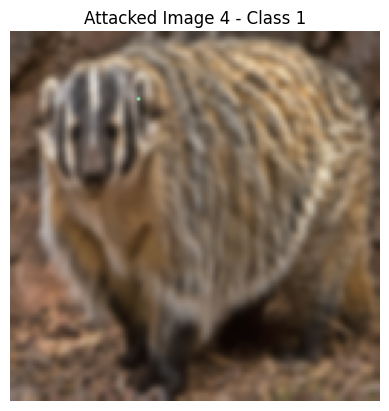

Class Label: 1


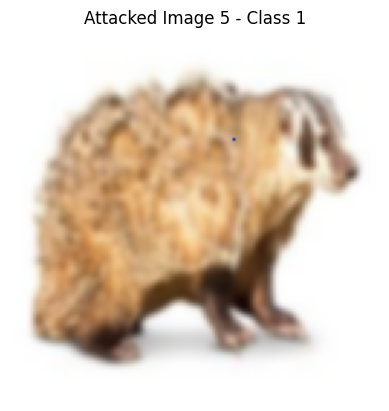

torch.Size([3, 128, 128])

In [24]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

dog_breeds_attacked = torch.load('animals-attacked.pt')

def show_image(image_tensor, title=""):
    image = image_tensor.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


for i in range(0,5): 
    attacked_image, label = dog_breeds_attacked[i+100]
    print(f"Class Label: {label}")
    show_image(attacked_image, title=f"Attacked Image {i+1} - Class {label}")
attacked_image.shape

Class Label: 1


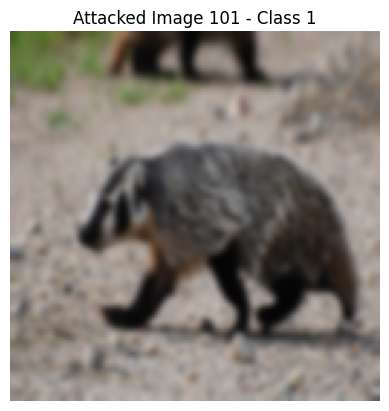

Class Label: 1


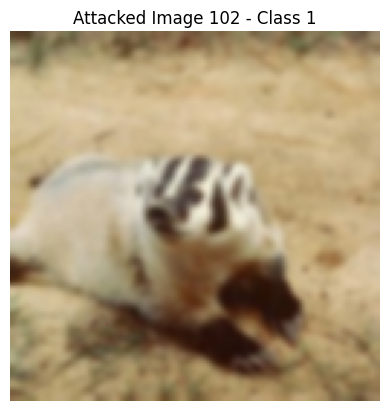

Class Label: 1


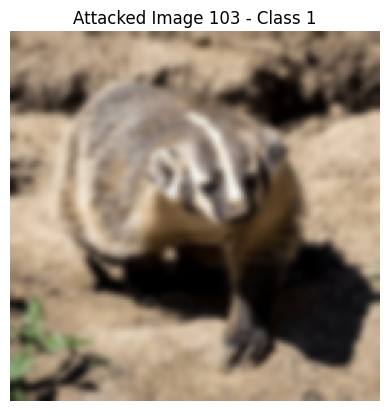

Class Label: 1


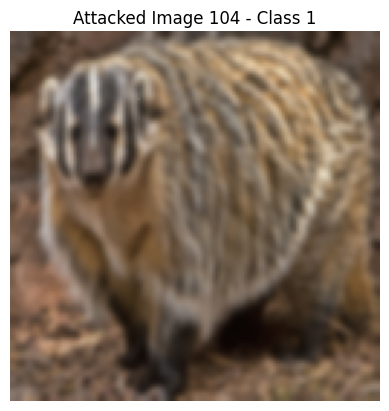

Class Label: 1


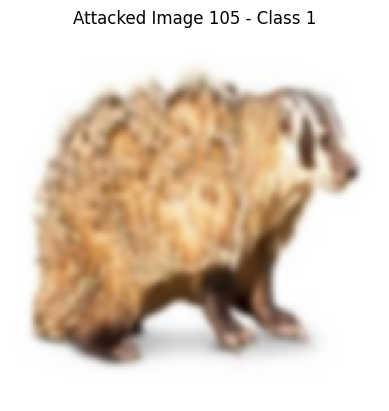

torch.Size([1, 3, 128, 128])

In [25]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

dog_breeds_attacked = torch.load('repaired_images.pt')

def show_image(image_tensor, title=""):
    image = image_tensor.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


for i in range(100,105): 
    attacked_image, label = dog_breeds_attacked[i]
    print(f"Class Label: {label}")
    show_image(attacked_image, title=f"Attacked Image {i+1} - Class {label}")
attacked_image.shape

Evaluating repaired images: 100%|██████████| 359/359 [00:00<00:00, 761.04it/s]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.95      1.00      0.98        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      0.97      0.99        40
           5       0.95      1.00      0.98        40
           6       1.00      0.95      0.97        39
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359

Accuracy: 98.89%


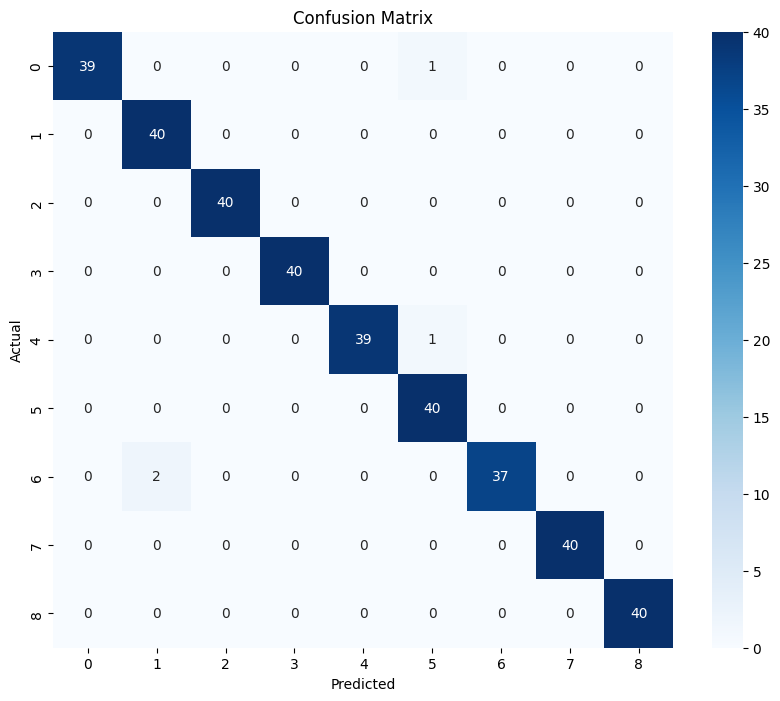

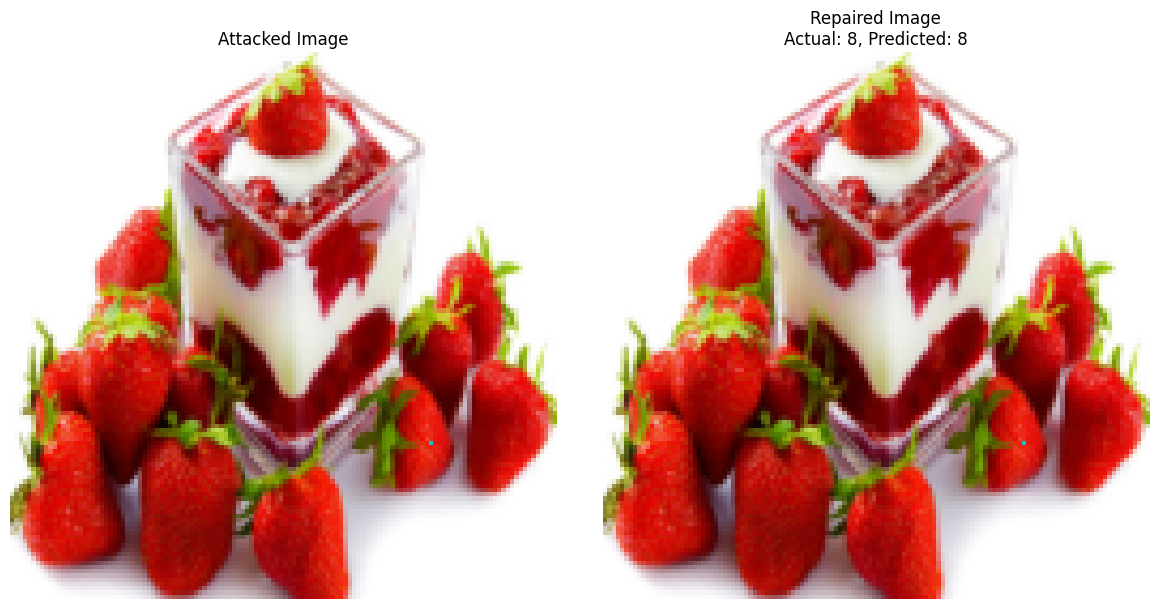

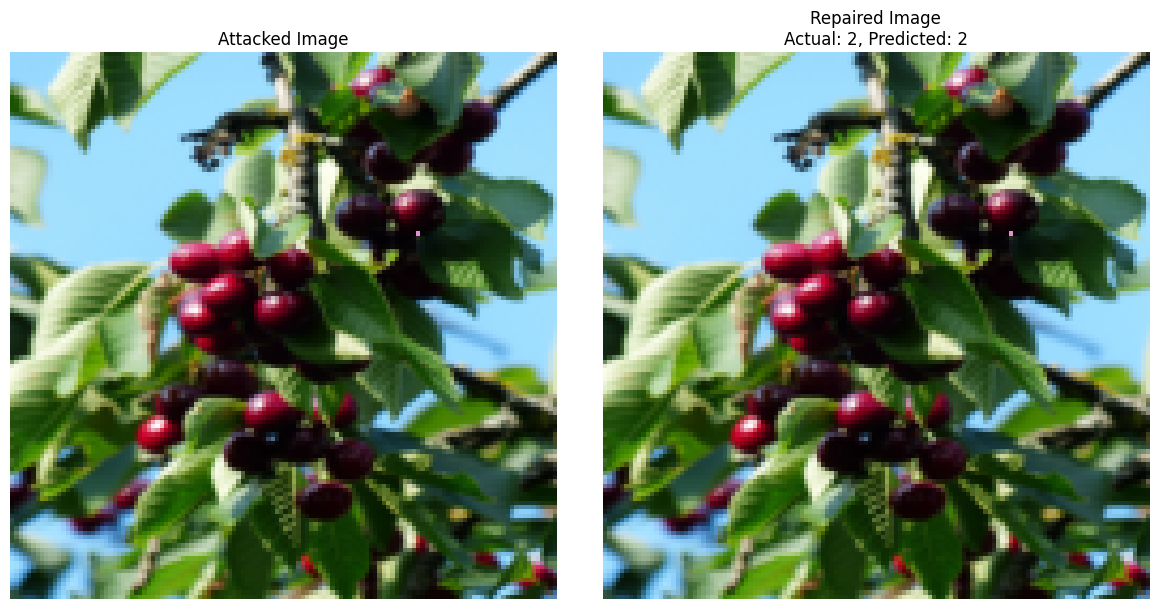

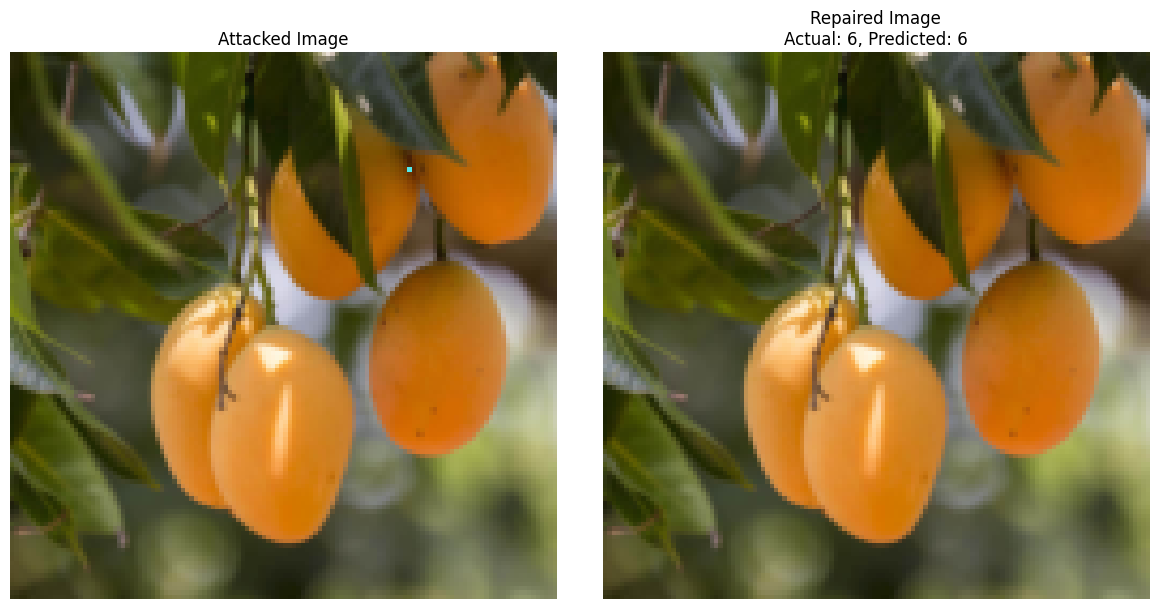

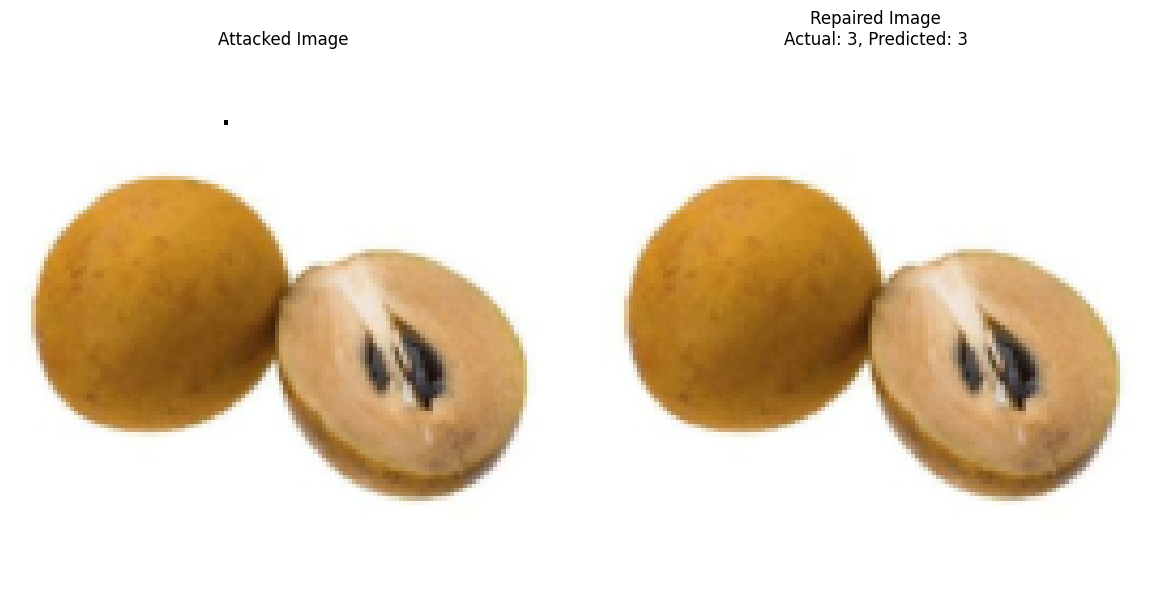

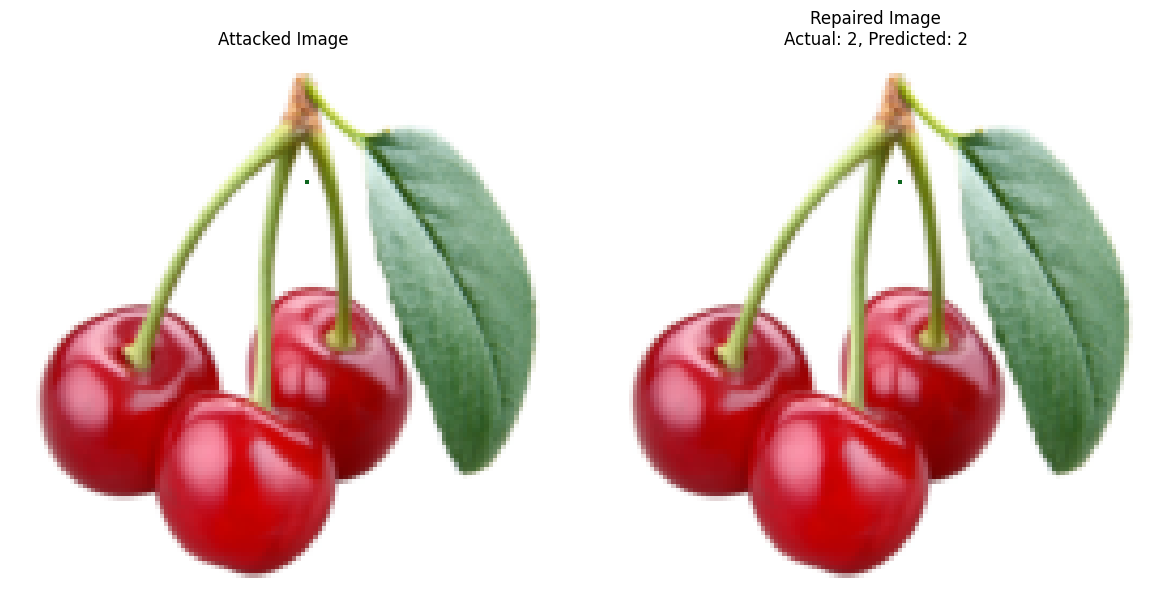

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import numpy as np
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import numpy as np

# Repair algorithm functions
def color_difference(a, b):
    return torch.abs(a[0] - b[0]) + torch.abs(a[1] - b[1]) + torch.abs(a[2] - b[2])

def generate_difference_map(patch):
    lambda_map = torch.zeros((16, 16), device=patch.device)
    ct = 125 / 255.0  # color threshold, normalized to 0-1 range

    for i in range(16):
        for j in range(16):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 16 and 0 <= nj < 16:
                        neighbors.append(patch[:, ni, nj])
            
            diff_count = sum(color_difference(patch[:, i, j], neighbor) > ct for neighbor in neighbors)
            lambda_map[i, j] = diff_count / len(neighbors) * 10

    return lambda_map

def generate_average_map(patch, lambda_map):
    epsilon_map = torch.zeros((16, 16, 3), device=patch.device)
    at = 9  # average threshold

    for i in range(16):
        for j in range(16):
            neighbors = []
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 16 and 0 <= nj < 16 and lambda_map[ni, nj] < at:
                        neighbors.append(patch[:, ni, nj])
            
            if neighbors:
                epsilon_map[i, j] = torch.stack(neighbors).mean(dim=0)
            else:
                epsilon_map[i, j] = patch[:, i, j]

    return epsilon_map

def reconstruct_patch(patch, lambda_map, epsilon_map):
    rt = 8  # replacement threshold
    reconstructed_patch = patch.clone()

    for i in range(16):
        for j in range(16):
            if lambda_map[i, j] > rt:
                reconstructed_patch[:, i, j] = epsilon_map[i, j]

    return reconstructed_patch

def repair_patch(patch):
    lambda_map = generate_difference_map(patch)
    epsilon_map = generate_average_map(patch, lambda_map)
    return reconstruct_patch(patch, lambda_map, epsilon_map)

def detect_attacked_patch(image, model):
    patch_size = 16
    patches = []
    patch_probs = []

    for row in range(0, 128, patch_size):
        for col in range(0, 128, patch_size):
            patch = image[:, :, row:row + patch_size, col:col + patch_size]
            patches.append(patch)

    with torch.no_grad():
        for patch in patches:
            output = model(patch)
            prob = F.softmax(output, dim=1)
            patch_probs.append(prob[0][1].item())  

    attacked_patch_index = patch_probs.index(max(patch_probs))
    return attacked_patch_index, patches[attacked_patch_index]
def repair_patch(patch):
    lambda_map = generate_difference_map(patch)
    epsilon_map = generate_average_map(patch, lambda_map)
    reconstructed_patch = reconstruct_patch(patch, lambda_map, epsilon_map)
    
    # Convert to numpy array for OpenCV processing
    reconstructed_np = reconstructed_patch.cpu().numpy().transpose(1, 2, 0)
    
    # Apply Gaussian blur
    blurred_np = cv2.GaussianBlur(reconstructed_np, (3, 3), 0.5)
    
    # Convert back to torch tensor
    blurred_patch = torch.from_numpy(blurred_np.transpose(2, 0, 1)).float().to(patch.device)
    
    return blurred_patch

def repair_images(dog_breeds_attacked, model, device):
    repaired_images = []

    for attacked_image, label in tqdm(dog_breeds_attacked, desc="Repairing images"):
        attacked_image = attacked_image.to(device)
        
        attacked_patch_index, attacked_patch = detect_attacked_patch(attacked_image.unsqueeze(0), model)
        
        repaired_patch = repair_patch(attacked_patch.squeeze(0))
        
        row = (attacked_patch_index // 8) * 16
        col = (attacked_patch_index % 8) * 16
        attacked_image[:, row:row + 16, col:col + 16] = repaired_patch
        
        repaired_images.append((attacked_image.cpu(), label))

    return repaired_images

# Main script
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PatchCNN().to(device)
model.load_state_dict(torch.load('patchCNN.pt'))

# Load attacked images
dog_breeds_attacked = torch.load('animals-attacked.pt')

# Repair images
repaired_images = repair_images(dog_breeds_attacked, model, device)

# Load the classifier model
num_classes = len(class_names)

classifier_model = SimpleCNN(num_classes).to(device)
classifier_model.load_state_dict(torch.load('classifier_cnn_model.pt'))
classifier_model.eval()

# Evaluate on repaired images
true_labels = []
predicted_labels = []

with torch.no_grad():
    for repaired_image, label in tqdm(repaired_images, desc="Evaluating repaired images"):
        repaired_image = repaired_image.unsqueeze(0).to(device)
        output = classifier_model(repaired_image)
        _, predicted = torch.max(output, 1)
        true_labels.append(label)
        predicted_labels.append(predicted.item())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate accuracy
accuracy = sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display 5 random repaired images with predicted and actual classes, alongside the attacked images
random_indices = random.sample(range(len(repaired_images)), 5)

for idx in random_indices:
    attacked_image, label = dog_breeds_attacked[idx]
    repaired_image, _ = repaired_images[idx]
    
    attacked_image_np = attacked_image.cpu().numpy().transpose(1, 2, 0)
    repaired_image_np = repaired_image.cpu().numpy().transpose(1, 2, 0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(attacked_image_np)
    ax1.set_title("Attacked Image")
    ax1.axis('off')
    
    ax2.imshow(repaired_image_np)
    ax2.set_title(f"Repaired Image\nActual: {label}, Predicted: {predicted_labels[idx]}")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
